In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read the file
df = pd.read_parquet("data/panel_sim_small.parquet")

# Peek at it
print(df.head(20))          # first 20 rows
print(df.shape)           # (rows, columns)
print(df.columns.tolist())# column names


            id         dt  day  month  year  billing_cycle_end  billing_cycle  \
0   1006586084 2009-12-31   31     12  2009                  0              1   
1   1006586084 2010-01-01    1      1  2010                  0              1   
2   1006586084 2010-01-02    2      1  2010                  0              1   
3   1006586084 2010-01-03    3      1  2010                  0              1   
4   1006586084 2010-01-04    4      1  2010                  0              1   
5   1006586084 2010-01-05    5      1  2010                  0              1   
6   1006586084 2010-01-06    6      1  2010                  0              1   
7   1006586084 2010-01-07    7      1  2010                  0              1   
8   1006586084 2010-01-08    8      1  2010                  0              1   
9   1006586084 2010-01-09    9      1  2010                  0              1   
10  1006586084 2010-01-10   10      1  2010                  0              1   
11  1006586084 2010-01-11   

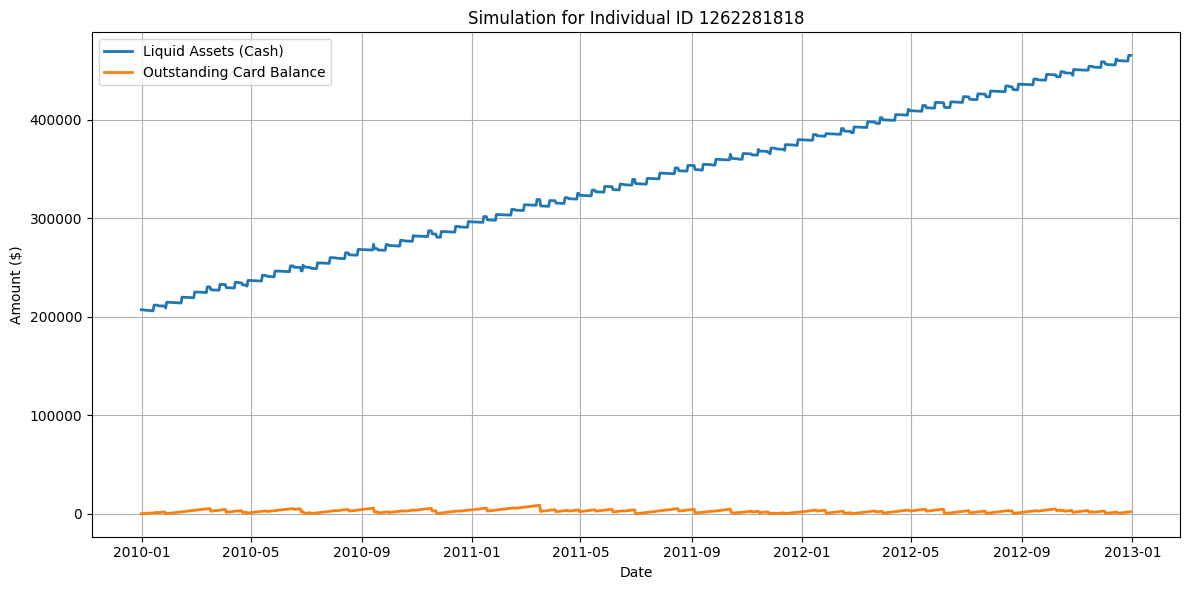

In [5]:
# time series plot to watch that person’s cash go up and down with paydays/consumption and their card balance rise/fall with spending and payments

interesting_ids = (
    df.groupby('id')['outstanding_balance']
      .max()
      .loc[lambda x: x > 5000]
      .index
)

# Pick the first interesting one
one_id = interesting_ids[0]
df_one = df[df['id'] == one_id].copy()

# Plot their cash vs. credit balance
plt.figure(figsize=(12,6))
plt.plot(df_one['dt'], df_one['liquid_assets'], label='Liquid Assets (Cash)', linewidth=2)
plt.plot(df_one['dt'], df_one['outstanding_balance'], label='Outstanding Card Balance', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.title(f"Simulation for Individual ID {one_id}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()